# CPSC 330 - Applied Machine Learning 

## Homework 5: Evaluation metrics
### Associated lectures: [Lectures 9, 10](https://ubc-cs.github.io/cpsc330/README.html) 

**Due date: Monday, Feb 28, 2022 at 11:59pm**

## Imports

In [1]:
import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import plot_confusion_matrix

## Instructions 
<hr>
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Exercise 1: Precision, recall, and f1 score by hand <a name="1"></a>
<hr>

Consider the problem of predicting whether a patient has a disease or not. Below are confusion matrices of two machine learning models: Model A and Model B. 

- Model A

|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 18 | 22 |
| **Actual no disease**       | 10 | 100 |


- Model B

|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 23 | 17 |
| **Actual no disease**       | 20 | 90 |

### 1.1 Positive vs. negative class 
rubric={points:2}

**Your tasks:**

Precision, recall, and f1 score depend upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class? Why? 

# Answer 
From lecture 9

The disease class is likely to be the "positive" class because this is the class that we are interested in spotting.

<br><br>

### 1.2 Accuracy
rubric={points:2}

**Your tasks:**

Calculate accuracies for Model A and Model B. 

We'll store all metrics associated with Model A and Model B in the `results_dict` below. 

In [2]:
results_dict = {"A": {}, "B": {}}

In [3]:
results_dict["A"]["accuracy"] = None
results_dict["B"]["accuracy"] = None

In [4]:
# Adatped from lecture 9
a_tn = 100
a_tp = 18
a_fn = 22
a_fp = 10
b_tn = 90
b_tp = 23
b_fn = 17
b_fp = 20
a_accuracy = (a_tn + a_tp) / (a_tn + a_tp + a_fn + a_fp)
b_accuracy = (b_tn + b_tp) / (b_tn + b_tp + b_fn + b_fp)
results_dict["A"]["accuracy"] = a_accuracy
results_dict["B"]["accuracy"] = b_accuracy

In [5]:
assert tests_hw5.ex1_2_1(
    results_dict["A"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [6]:
assert tests_hw5.ex1_2_2(
    results_dict["B"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [7]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.786667,0.753333


<br><br>

### 1.3 Which model would you pick? 
rubric={points:1}

**Your tasks:**

Which model would you pick simply based on the accuracy metric? 

# Answer

I would pick model A based on the accuracy metric because A has a higher accuracy compared to B

<br><br>

### 1.4 Precision, recall, f1-score
rubric={points:6}

**Your tasks:**

1. Calculate precision, recall, f1-score for Model A and Model B manually, without using `scikit-learn` tools. 


In [8]:
results_dict["A"]["precision"] = None
results_dict["B"]["precision"] = None
results_dict["A"]["recall"] = None
results_dict["B"]["recall"] = None
results_dict["A"]["f1"] = None
results_dict["B"]["f1"] = None




In [9]:
def get_precision(tp, fp):
    return tp / (tp + fp)

def get_recall(tp, fn):
    return tp / (tp + fn)

def get_f1(recall, precision):
    return 2*(recall * precision) / (recall + precision)

a_precision = get_precision(a_tp, a_fp)
a_recall = get_recall(a_tp, a_fn)
a_f1 = get_f1(a_recall, a_precision)

b_precision = get_precision(b_tp, b_fp)
b_recall = get_recall(b_tp, b_fn)
b_f1 = get_f1(b_recall, b_precision)

results_dict["A"]["precision"] = a_precision
results_dict["B"]["precision"] = b_precision
results_dict["A"]["recall"] = a_recall
results_dict["B"]["recall"] = b_recall
results_dict["A"]["f1"] = a_f1
results_dict["B"]["f1"] = b_f1

In [10]:
assert tests_hw5.ex1_4_1(
    results_dict["A"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [11]:
assert tests_hw5.ex1_4_2(
    results_dict["B"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [12]:
assert tests_hw5.ex1_4_3(
    results_dict["A"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [13]:
assert tests_hw5.ex1_4_4(
    results_dict["B"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [14]:
assert tests_hw5.ex1_4_5(
    results_dict["A"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [15]:
assert tests_hw5.ex1_4_6(
    results_dict["B"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


Show the dataframe with all results. 

In [16]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.786667,0.753333
precision,0.642857,0.534884
recall,0.450000,0.575000
f1,0.529412,0.554217


<br><br>

### 1.5 Discussion
rubric={points:4}

**Your tasks:**
1. Which metric is more informative in this problem? Why? 
2. Which model would you pick based on this information? 

# Answer

Adapted from lecture 9

1. F1 score is more informative than accuracy in this situation because accuracy is misleading when we have a class imbalance. Whereas f1 score combines both recall (model's sensitivity to predicting disease) and precision (model's confidence that the positive prediction is correct) to provide a better measurement when there is a class imblance.
2. I would pick model B because it has a better f1 score compared to A.

<br><br>

### (Optional) 1.6 
rubric={points:1}

**Your tasks:**

Provide 2 to 3 example classification datasets (with links) where accuracy metric would be misleading. Discuss which evaluation metric would be more appropriate for each dataset. You may consider datasets we have used in this course so far. You could also look up datasets on Kaggle. 

# Answer
1. https://www.kaggle.com/mlg-ulb/creditcardfraud non-fraud class is much bigger than fraud class
2. https://www.kaggle.com/ozlerhakan/spam-or-not-spam-dataset spam class is much bigger than non-spam class

<br><br><br><br>

### Exercise 2: Classification evaluation metrics using `sklearn` <a name="2"></a>
<hr>

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In class, we looked at credit card fraud dataset which is a classic example of an imbalanced dataset. 

Another example is customer churn datasets. [Customer churn](https://en.wikipedia.org/wiki/Customer_attrition) refers to the notion of customers leaving a subscription service like Netflix. In this exercise, we will try to predict customer churn in a dataset where most of the customers stay with the service and a small minority cancel their subscription. To start, please download the [Kaggle telecom customer churn dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). Once you have the data, you should be able to run the following code:

The starter code below reads the data CSV as a pandas dataframe and splits it into 70% train and 30% test. 

Note that `churn` column in the dataset is the target. "True" means the customer left the subscription (churned) and "False" means they stayed.

> Note that for this kind of problem a more appropriate technique is something called survival analysis and we'll be talking about it later in the course. For now, we'll just treat it as a binary classification problem. 

In [17]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv", encoding="utf-8")
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,False
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,False
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,False
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,False
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,WY,126,408,339-9798,yes,no,0,197.6,126,33.59,...,112,20.95,285.3,104,12.84,12.5,8,3.38,2,False
3089,WV,70,510,348-3777,no,yes,30,143.4,72,24.38,...,92,14.45,127.9,68,5.76,9.4,4,2.54,3,False
1766,NJ,125,415,406-6400,no,no,0,182.3,64,30.99,...,121,11.88,171.6,96,7.72,11.6,7,3.13,2,False
1122,NE,159,415,362-5111,no,no,0,189.1,105,32.15,...,147,20.92,242.0,106,10.89,10.4,5,2.81,1,True


<br><br>

### 2.1 Distribution of target values
rubric={points:4}

**Your tasks:**

Examine the distribution of target values in the train split. Do you see class imbalance? If yes, do we need to deal with it? Why or why not? 

In [18]:
# https://www.marsja.se/pandas-count-occurrences-in-column-unique-values/#:~:text=To%20count%20the%20number%20of%20occurrences%20in%20e.g.%20a%20column,in%20the%20column%20%E2%80%9Ccondition%E2%80%9D.
train_df["churn"].value_counts(normalize=True)

False    0.850407
True     0.149593
Name: churn, dtype: float64

# Answer
There is a class imbalance because the "True" class makes up only 15% of the dataset whereas the "False" class makes up 85% of the dataset. Due to the class imbalance, the model's accuracy measure will not be useful so we want to be able to handle the class imbalance and have better metrics to detect "churned" customers in order for the telecom company to have better customer retention plans.

<br><br>

### (Optional) 2.2 EDA 
rubric={points:1}

**Your tasks:**

Come up with **two** exploratory questions you would like to answer and explore those. Briefly discuss your results in 1-3 sentences.

You are welcome to use `pandas_profiling` (see Lecture 10) but you don't have to.

<br><br>

### 2.3 Column transformer 
rubric={points:10}

The code below creates `X_train`, `y_train`, `X_test`, `y_test` for you. 
In preparation for building a classifier, set up a `ColumnTransformer` that performs whatever feature transformations you deem sensible. This can include dropping features if you think they are not helpful. Remember that by default `ColumnTransformer` will drop any columns that aren't accounted for when it's created.

In each case, briefly explain your rationale with 1-2 sentences. You do not need an explanation for every feature, but for every group of features that are being transformed the same way. For example, "I am doing transformation X to the following categorical features: `a`, `b`, `c` because of reason Y," etc.

In [19]:
X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]

In [20]:
X_train.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,204.7,77,17.40,256.6,101,11.55,5.7,4,1.54,1
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,142.3,76,12.10,91.2,86,4.10,10.9,5,2.94,2
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,89.7,103,7.62,220.0,91,9.90,15.6,4,4.21,2
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,163.1,105,13.86,282.5,100,12.71,10.0,3,2.70,1
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,261.5,95,22.23,241.6,104,10.87,11.4,9,3.08,2


In [21]:
X_train.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

# Answer
In all groups of features: applied imputation to clean up any missing values
Numeric features: applied scaling to standardize the range of numeric features so that features with larger ranges do not dominate features with smaller ranges.
Categorical features: applied OHE to turn categorical features into numerical data that can be used by models.
Binary features: applied OHE with drop="if_binary" to turn these features from binary text to 0 and 1 combined in a single column.
Dropped "phone number" feature because they are presumably randomly generated for each customer and will not have any useful patterns to learn from.
Made "churn" the target column.

In [22]:
# Adapted from lecture 5, 6
numeric_features = [
    "account length",
    "number vmail messages",
    "total day minutes", 
    "total day calls", 
    "total day charge", 
    "total eve minutes", 
    "total eve calls", 
    "total eve charge", 
    "total night minutes", 
    "total night calls", 
    "total night charge",
    "total intl minutes", 
    "total intl calls",
    "total intl charge",
    "customer service calls"]
categorical_features = ["state", "area code"]
binary_features = ["international plan", "voice mail plan"]
drop_features = ["phone number"]
target = "churn"

numeric_transformer = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
categorical_transformer = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore", sparse=False))
binary_transformer = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(drop="if_binary"))

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
    (binary_transformer, binary_features),
    ("drop", drop_features)
)

In [23]:
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['account length', 'number vmail messages',
                                  'total day minutes', 'total day calls',
                                  'total day charge', 'total eve minutes',
                                  'total eve calls', 'total eve charge',
                                  'total night minutes', 'total night calls',
                                  'total night charge', '...
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder'

<br><br>

### 2.4 Visualizing the transformed data 
rubric={points:4}

Fit and transform your `ColumnTransformer` on your training set. Print the first 5 rows of the transformed data as a dataframe (not numpy array). See lecture 10 for code that can get you the new column names after transforming. 

In [24]:
# Adapted from lecture 10
preprocessor.fit(X_train) 
preprocessor.named_transformers_

{'pipeline-1': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 'pipeline-2': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse=False))]),
 'pipeline-3': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotencoder', OneHotEncoder(drop='if_binary'))]),
 'drop': 'drop'}

In [25]:
ohe_columns = list(
    preprocessor.named_transformers_["pipeline-2"]
    .named_steps["onehotencoder"]
    .get_feature_names_out(categorical_features)
)
new_columns = numeric_features + binary_features + ohe_columns

In [26]:
X_train_enc = pd.DataFrame(
    preprocessor.transform(X_train), index=X_train.index, columns=new_columns
)
X_train_enc.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510
1402,-0.767893,-0.587624,0.618769,-0.721211,0.618927,0.069871,-1.156734,0.069926,1.088667,0.052115,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1855,-0.843585,-0.587624,-1.293778,1.655252,-1.293517,-1.167277,-1.207278,-1.166291,-2.162302,-0.720990,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
633,0.544113,1.900976,-0.609809,0.169963,-0.609654,-2.210130,0.157417,-2.211244,0.369287,-0.463288,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1483,0.165650,-0.587624,0.998345,-0.473663,0.998611,-0.754894,0.258506,-0.755774,1.597736,0.000574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2638,0.115188,-0.587624,-0.994886,0.764078,-0.994731,1.195994,-0.246937,1.196515,0.793839,0.206736,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<br><br>

### 2.5 area code feature
rubric={points:4}

The original dataset had a feature called `area code`. Let's assume we encoded this feature with one-hot encoding.

1. The area codes were numbers to begin with. Why do we want to use one-hot encoding on this feature?
2. What were the possible values of `area code`? 
3. What new feature(s) were created to replace `area code`? 

In [27]:
X_train["area code"].unique()

array([415, 510, 408], dtype=int64)

In [28]:
for column in X_train_enc.columns:
    if "area code" in column:
        print(column)

area code_408
area code_415
area code_510


# Answer

1. We want to use OHE instead because although area codes are numeric, they are not meaningful numeric data. Instead, they can be thought of more so like numeric labels which fits more into the categorical type.
2. The possible values of area code were [415, 510, 408].
3. Three new features were created for area code: [area code_408, area code_415, area code_510]

<br><br>

### 2.6 Dummy classifier
rubric={points:4}

**Your tasks:**

Create a `DummyClassifier`. Report the following scoring metrics via cross-validation: accuracy, precision, recall, f1-score. Briefly comment on your results, including any warnings the code produces (2 sentences max).

# Answer
Only accuracy has a non-zero value while precision, recall, and f1 are all zero. I get a warning about no precision samples because the DC only predicts False because that's the most frequent class, therefore we do not have any false positive samples so precision cannot be determined.

In [29]:
# Adapted from lecturer 9
dc = DummyClassifier()
scoring = [
    "accuracy",
    "precision",
    "recall",
    "f1",
]
scores = cross_validate(dc, X_train, y_train, return_train_score=True, scoring=scoring)
pd.DataFrame(scores).mean()

C:\ProgramData\Miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_cl

fit_time           0.000399
score_time         0.002793
test_accuracy      0.850408
train_accuracy     0.850407
test_precision     0.000000
train_precision    0.000000
test_recall        0.000000
train_recall       0.000000
test_f1            0.000000
train_f1           0.000000
dtype: float64

<br><br>

### 2.7 Logistic regression
rubric={points:8} 

**Your tasks:**

1. Train and score a logistic regression classifier on the dataset. 
2. Report the same metrics as in the previous part.
3. Are you satisfied with the results? Use your `DummyClassifier` results as a reference point. Discuss in a few sentences. 

In [30]:
# Adapted from lecture 6
lr_pipe = make_pipeline(preprocessor, LogisticRegression())


In [31]:
scoring = [
    "accuracy",
    "precision",
    "recall",
    "f1",
]
scores = cross_validate(lr_pipe, X_train, y_train, return_train_score=True, scoring=scoring)
pd.DataFrame(scores).mean()

fit_time           0.042588
score_time         0.012167
test_accuracy      0.855978
train_accuracy     0.866481
test_precision     0.548663
train_precision    0.639200
test_recall        0.209317
train_recall       0.246423
test_f1            0.302739
train_f1           0.355603
dtype: float64

# Answer
Compared to our DC, recall, precision, and f1 have increased and are no longer zero. However, due to class imbalance, our test_recall is still quite low (approx. 0.21), we will have a lot of false negatives. Moreover, our test_precision (approx. 0.55) is also low so we will end up with more false negatives. Overall, our true positives will be low and the results are not satisfactory.

<br><br>

### 2.8 Logistic regression with `class_weight`
rubric={points:6}

**Your tasks:**

1. Set the `class_weight` parameter of your logistic regression model to `'balanced'` and report the same metrics as in the previous part. 
2. Do you prefer this model to the one in the previous part? Discuss your results in a few sentences.

In [32]:
# Adapted from lecture 9 
lr_pipe = make_pipeline(preprocessor, LogisticRegression(class_weight = "balanced"))


In [33]:
scoring = [
    "accuracy",
    "precision",
    "recall",
    "f1",
]
scores = cross_validate(lr_pipe, X_train, y_train, return_train_score=True, scoring=scoring)
pd.DataFrame(scores).mean()

fit_time           0.047473
score_time         0.011170
test_accuracy      0.760807
train_accuracy     0.776252
test_precision     0.351154
train_precision    0.380165
test_recall        0.699213
train_recall       0.785814
test_f1            0.467027
train_f1           0.512418
dtype: float64

# Answer

2. We prefer this model over the previous model because we are addressing the class imbalance by setting class_weight="balanced". As a result, our test_recall score is higher which means there will be less false negatives, more true positives and more false positives. But in this context, it is OK to have false positives because it's better for the company to reach out to customers rather than losing customers due to churning.

<br><br>

### 2.9 Hyperparameter optimization
rubric={points:10}

Now let's tune the hyperparameters of our `LogisticRegression` using `GridSearchCV` to maximize cross-validation f1 score. 

**Your tasks:**

1. Jointly optimize `C` (choose some reasonable values) and `class_weight` (`None` vs. `'balanced'`) with `GridSearchCV` and `scoring="f1"`. 
2. What values of `C` and `class_weight` are chosen and what is the best cross-validation f1 score?

In [34]:
# Adapted from lecture 8, 9 
lr_pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
param_grid = {
    "logisticregression__class_weight" : [None, "balanced"],
    "logisticregression__C": [0.001, 0.01, 0.1, 1.0, 10, 100],
}

grid_search = GridSearchCV(
    lr_pipe, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring="f1"
)
grid_search.fit(X_train, y_train) # all the work is done here

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['account '
                                                                          'length',
                                                                          'number '
                                                                          'vmail '
                                              

In [35]:
grid_search.best_params_

{'logisticregression__C': 0.1, 'logisticregression__class_weight': 'balanced'}

In [36]:
grid_search.best_score_

0.47873599874436196

# Answer

C=0.1 was chosen
class_weight=balanced was chosen
best cv = 0.48 approx.

<br><br>

### 2.10 Test results
rubric={points:10}

**Your tasks**
1. Evaluate the best model on the test set. In particular show each of the following on the test set:  
    - Confusion matrix. 
    - Classification report. 
    - Precision-recall curve with average precision score.     
    - ROC curve with AUC. 
3. Comment on the results.    

> Note that we are not doing it here but in real life, you would also plot confusion matrix, precision-recall curve, and ROC curve on validation data to examine errors and to choose a threshold which works for your operating point. 

C:\ProgramData\Miniconda3\envs\cpsc330\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


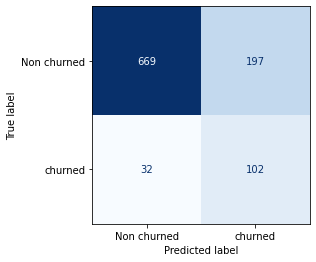

In [37]:
# Adapted from lecture 9
disp = plot_confusion_matrix(
    grid_search,
    X_test,
    y_test,
    display_labels=["Non churned", "churned"],
    values_format="d",
    cmap=plt.cm.Blues,
    colorbar=False,
)

In [38]:
from sklearn.metrics import classification_report

print(
    classification_report(
        y_test, grid_search.predict(X_test), target_names=["Non churned", "churned"]
    )
)

              precision    recall  f1-score   support

 Non churned       0.95      0.77      0.85       866
     churned       0.34      0.76      0.47       134

    accuracy                           0.77      1000
   macro avg       0.65      0.77      0.66      1000
weighted avg       0.87      0.77      0.80      1000



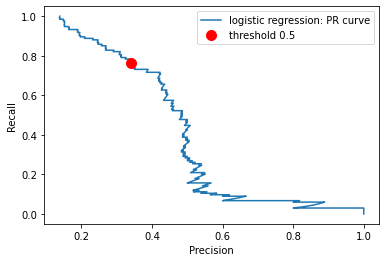

In [39]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test, grid_search.predict_proba(X_test)[:, 1]
)
plt.plot(precision, recall, label="logistic regression: PR curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(
    precision_score(y_test, grid_search.predict(X_test)),
    recall_score(y_test, grid_search.predict(X_test)),
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");

In [40]:
from sklearn.metrics import average_precision_score

ap_lr = average_precision_score(y_test, grid_search.predict_proba(X_test)[:, 1])
print("Average precision of logistic regression: {:.3f}".format(ap_lr))

Average precision of logistic regression: 0.456


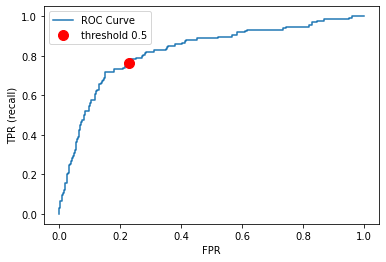

In [41]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

default_threshold = np.argmin(np.abs(thresholds - 0.5))

plt.plot(
    fpr[default_threshold],
    tpr[default_threshold],
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best")

In [42]:
from sklearn.metrics import roc_auc_score

roc_lr = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
print("AUC for logistic regression: {:.3f}".format(roc_lr))

AUC for logistic regression: 0.823


<br><br><br><br>

### Exercise 3: Regression metrics <a name="3"></a>
<hr> 


For this exercise, we'll use [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from `sklearn datasets`. The code below loads the dataset.  

In [43]:
from sklearn.datasets import fetch_california_housing

housing_df = fetch_california_housing(as_frame=True).frame

### 3.1: Data spitting and exploration 
rubric={points:4}

**Your tasks:**

1. Split the data into train (80%) and test (20%) splits. 
2. Explore the train split. Do you need to apply any transformations on the data? If yes, create a preprocessor with the appropriate transformations. 
3. Separate `X` and `y` in train and test splits. 

In [44]:
housing_train_df, housing_test_df = train_test_split(housing_df, test_size=0.2, random_state=123)

In [45]:
housing_train_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
9950,4.5694,28.0,6.219512,1.030488,504.0,3.073171,38.38,-122.33,2.875
3547,5.6392,18.0,5.951644,1.034816,3010.0,2.911025,34.26,-118.60,2.715
4448,1.7292,47.0,3.628032,1.032345,1452.0,3.913747,34.07,-118.21,1.917
6984,4.6226,36.0,5.126238,0.985149,988.0,2.445545,33.96,-118.02,2.197
4432,2.4375,49.0,4.024390,0.942073,1405.0,4.283537,34.08,-118.20,1.140


In [46]:
housing_train_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.870716,28.570918,5.422508,1.096515,1434.115734,3.064722,35.627757,-119.566976,2.069687
std,1.900132,12.582281,2.520931,0.491311,1130.309986,10.624706,2.134543,2.000519,1.154148
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.562500,18.000000,4.430476,1.005825,789.000000,2.429013,33.930000,-121.800000,1.194000
50%,3.529400,29.000000,5.227170,1.048765,1170.000000,2.816122,34.250000,-118.490000,1.804000
75%,4.750375,37.000000,6.051005,1.099493,1735.000000,3.278954,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,28566.000000,1243.333333,41.950000,-114.310000,5.000010


In [47]:
housing_train_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [48]:
# Create standard scaler for numeric datas. No categorical datas.
preprocessor = StandardScaler()

In [49]:
X_train = housing_train_df.drop(columns=["MedHouseVal"])
y_train = housing_train_df["MedHouseVal"]

X_test = housing_test_df.drop(columns=["MedHouseVal"])
y_test = housing_test_df["MedHouseVal"]

<br><br>

### 3.2 Baseline: DummyRegressor 
rubric={points:2}

**Your tasks:**
1. Carry out cross-validation using `DummyRegressor` with default scoring. 
2. What metric is used for scoring by default? 

In [50]:
# Adapted from lecture 10
dr = DummyRegressor()
scores = cross_validate(dr, X_train, y_train, cv=10, return_train_score=True)
pd.DataFrame(scores).mean()

fit_time       0.000898
score_time     0.000200
test_score    -0.000710
train_score    0.000000
dtype: float64

# Answer

By default, DR uses R^2 for scoring.


<br><br>

### 3.3 Different regressors
rubric={points:8}

In this exercise, we are going to use [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model which we haven't looked into yet. At this point you should feel comfortable using models with our usual ML workflow even if you don't know the details. We'll talk about `RandomForestRegressor` later in the course.  

The code below defines a custom scorer called `mape_scorer` and creates dictionaries for different regressors (`models`) and different scoring metrics (`score_types_reg`). 

**Your tasks:**

1. Using the `models` and the evaluation metrics `score_types_reg` in the code below, carry out cross-validation with each model, by passing the evaluation metrics to `scoring` argument of `cross_validate`. Use a pipeline with the model as an estimator if you are applying any transformations. 
2. Show results as a dataframe. 
3. Interpret the results. How do the models compare to the baseline? Which model seems to be performing well with different metrics? 


In [51]:
def mape(true, pred):
    return 100.0 * np.mean(np.abs((pred - true) / true))


# make a scorer function that we can pass into cross-validation
mape_scorer = make_scorer(mape, greater_is_better=False)

models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
}

score_types_reg = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "neg_root_mean_squared_error": "neg_root_mean_squared_error",
    "neg_mean_absolute_error": "neg_mean_absolute_error",
    "r2": "r2",
    "mape_scorer": mape_scorer,
}

In [52]:
# Adapted from lecture 7, 10
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
pipe = make_pipeline(preprocessor, Ridge())
scores = cross_validate(pipe, X_train, y_train, return_train_score=True, scoring = score_types_reg)
ridge_df = pd.DataFrame(scores).mean().T.to_frame(name="Ridge")

In [53]:
pipe = make_pipeline(preprocessor, RandomForestRegressor())
scores = cross_validate(pipe, X_train, y_train, return_train_score=True, scoring = score_types_reg)
rf_df = pd.DataFrame(scores).mean().T.to_frame(name="Random Forest")

In [54]:
result = pd.concat([ridge_df, rf_df], axis = 1)
result

,Ridge,Random Forest
fit_time,0.006184,5.239641
score_time,0.002992,0.063829
test_neg_mean_squared_error,-0.683433,-0.263219
train_neg_mean_squared_error,-0.524369,-0.036810
test_neg_root_mean_squared_error,-0.810381,-0.512938
train_neg_root_mean_squared_error,-0.724132,-0.191849
test_neg_mean_absolute_error,-0.535444,-0.334941
train_neg_mean_absolute_error,-0.531388,-0.124764
test_r2,0.481744,0.802146
train_r2,0.606300,0.972362


# Answer
R^2 score of both Ridge and Random Forest are better than DR's R^2 score. Random Forest is performing better than Ridge across different metrics. Random Forest has a higher (better) R^2 score. Random Forest has a lower percent error (MAPE). Random Forest has a better MSE and RMSE - although Random Forest has "greater errors" mathematically speaking, this is due to placing a negative sign to the error values when we use regression metrics with sklearn.

<br><br>

### (Optional) 3.4 Hyperparameter optimization 
rubric={points:1}

**Your tasks:**
1. Carry out hyperparameter optimization using `RandomizedSearchCV` and `Ridge` with the following `param_dist`. The `alpha` hyperparameter of `Ridge` controls the fundamental tradeoff. Choose the metric of your choice for hyperparameter optimization. 
2. Are you getting better scores compared to the default values?

In [55]:
from scipy.stats import loguniform

param_dist = {"ridge__alpha": loguniform(1e-3, 1e3)}

<br><br>

### 3.5 Test results
rubric={points:4}

**Your tasks:**

1. Try the best model on the test set.
2. Briefly comment on the results. (1 to 2 sentences) 

In [56]:
pipe = make_pipeline(preprocessor, RandomForestRegressor())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8123444217483275

# Answer

Our test score is relatively high, so the model will generalize well on unseen data.

<br><br>

### 3.6 Model interpretation  
rubric={points:4}

Ridge is a linear model and it learns coefficients associated with each feature during `fit()`. 

**Your tasks:**

1. Visualize coefficients learned by the `Ridge` model above as a pandas dataframe with two columns: features and coefficients. If you attempted 3.4, use the `Ridge` model with best hyperparameters. Otherwise use the `Ridge` model with default hyperparameters. 
2. Increasing which feature values would result in higher housing price? 

In [57]:
# Adapted from lecture 7
pipe = make_pipeline(preprocessor, Ridge())
pipe.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [58]:
coeffs = pipe.named_steps["ridge"].coef_

In [59]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [60]:
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
pd.DataFrame(data={"features": X_train.columns, "Coefficients": coeffs})

,features,Coefficients
0,MedInc,0.835964
1,HouseAge,0.115302
2,AveRooms,-0.281707
3,AveBedrms,0.318049
4,Population,-0.007375
5,AveOccup,-0.041683
6,Latitude,-0.889398
7,Longitude,-0.854789


# Answer
Increasing MedInc, HouseAge, and AveBedrms features would increase house price

<br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 